## Try to see the electeron gun signal and check the ratio between pixels and meV

This log is part of the data_analysis for 1st POLARIS XFEL beamtime at Desy, FLASH (Oct.2018)

Before we check the ratio, we have already known that the Pixels2V is ~ 0.1654*(Ep)/1000 from the computer setting

----------- 
 Created by  Hsin-Yi Wang (wang.hy@fysik.su.se), Date: 30-Sep-2018
- Note: This script shuld be operated under Python 3 environment 

### Import modules and useful function

In [37]:
import numpy as np
import random
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import h5py
import sys
from os import walk
from mpl_toolkits.axes_grid1 import make_axes_locatable

sys.path.insert(0, '../src/')
import fit_data_tools
from fit_data_tools import *

### Load image data and find the maxium position

['FLASH1_USER2_stream_2_run24997_file2_20181004T190322.1.h5'
 'FLASH1_USER2_stream_2_run24997_file1_20181004T190014.1.h5']
['FLASH1_USER2_stream_2_run24995_file2_20181004T185356.1.h5'
 'FLASH1_USER2_stream_2_run24995_file1_20181004T185049.1.h5']
['FLASH1_USER2_stream_2_run24994_file1_20181004T181506.1.h5'
 'FLASH1_USER2_stream_2_run24994_file2_20181004T181804.1.h5']
['FLASH1_USER2_stream_2_run24992_file1_20181004T180624.1.h5'
 'FLASH1_USER2_stream_2_run24992_file2_20181004T180920.1.h5']
['FLASH1_USER2_stream_2_run24993_file2_20181004T181358.1.h5'
 'FLASH1_USER2_stream_2_run24993_file1_20181004T181051.1.h5']
['FLASH1_USER2_stream_2_run24996_file1_20181004T185531.1.h5'
 'FLASH1_USER2_stream_2_run24996_file2_20181004T185844.1.h5']


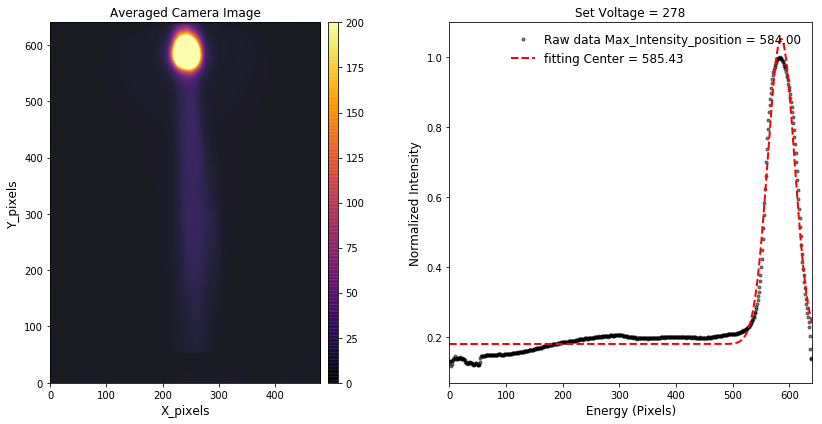

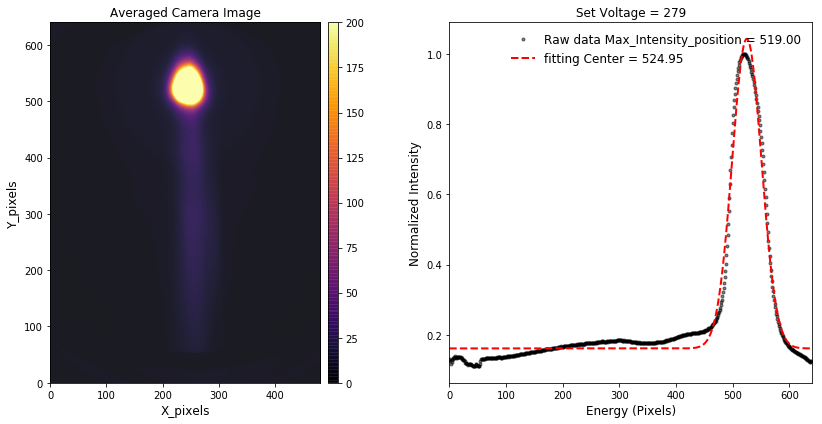

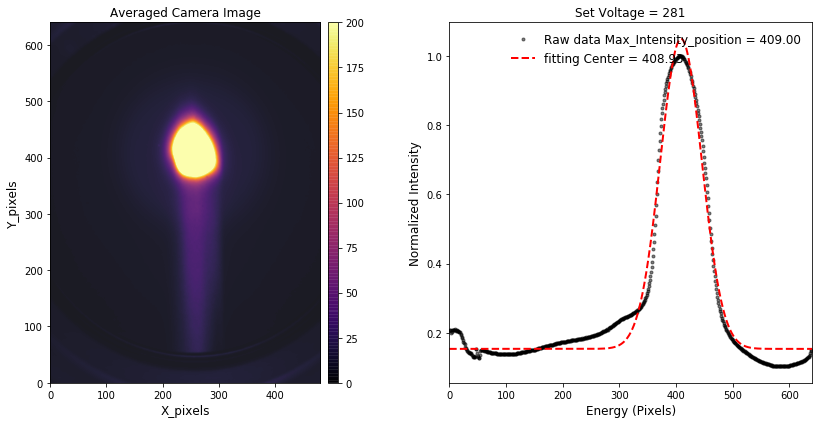

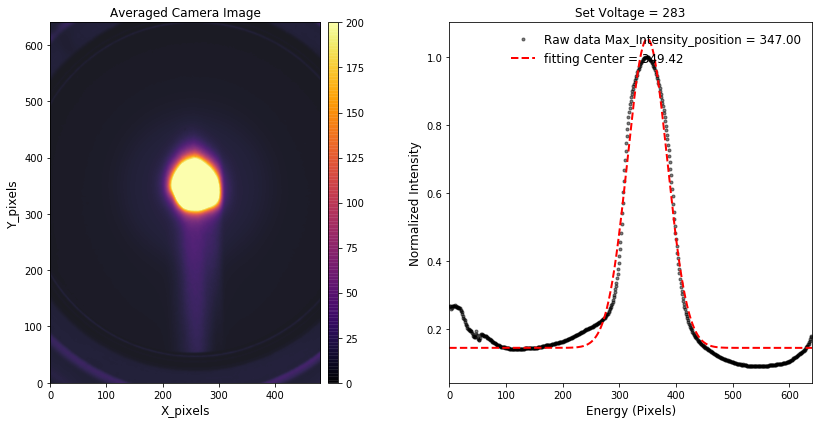

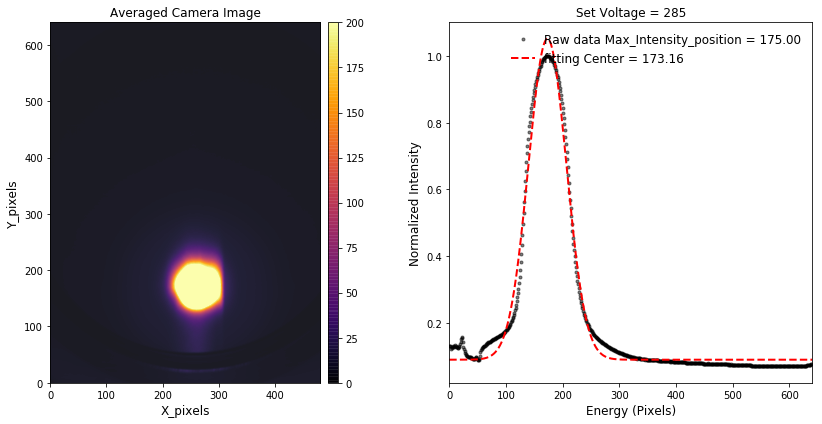

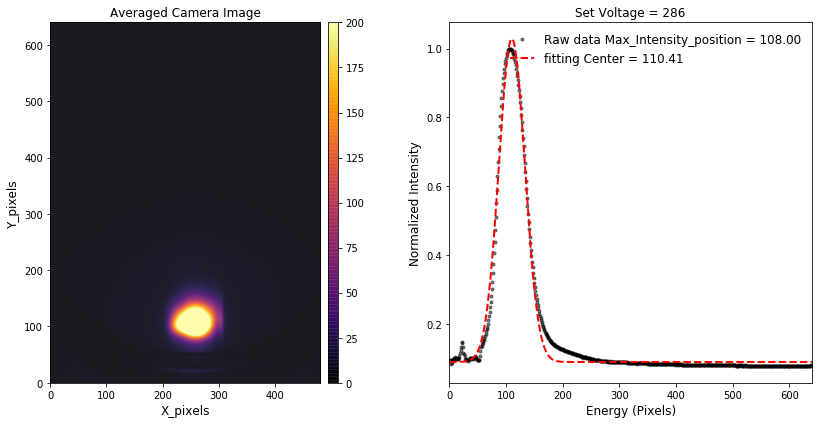

In [50]:
files = [9,7,6,4,5,8]
set_eV = np.array([278,279,281,283,285,286])

j = 0
while j < len(files):
    data_path = '/Users/hsin-yiwang/Desktop/Insitucell_for_XPS/FlashBeamtime/DATA/XPSele%03d/' %files[j]
    data_names = discover_datas(data_path)
    print (data_names)
    Fit_center = []
    Total_image = []
    Total_shots = []
    for i in range(len(data_names)):
        h5file = h5py.File(data_path+data_names[i], 'r')
        Image = h5file['/FL1/Experiment/Camera/PG/Basler FW 1/image/'].value
        thr = 3
        Image[Image<thr]=0
        N_shots = Image.shape[0]
        sum_image = np.sum(Image, axis = 0)
        Total_image.append(sum_image)
        Total_shots.append([N_shots])

    plt.figure(figsize=[12,6])
    
    ax = plt.subplot(1,2,1)
    Avg_image = np.sum(Total_image, axis = 0)/np.sum(Total_shots)
    plt.imshow(Avg_image,vmin=0,vmax=200, origin='lower', interpolation='bicubic',cmap='inferno',alpha = 0.9)
    plt.title('Averaged Camera Image',size=12)
    plt.xlabel('X_pixels',size=12)
    plt.ylabel('Y_pixels',size=12)
    plt.xlim(0,480)
    plt.ylim(0,640)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="4%", pad=0.1)
    plt.colorbar(cax=cax)
    plt.subplots_adjust(wspace=0.5)
    
    plt.subplot(1,2,2)
    xpixel = np.arange(Avg_image.shape[0])
    Profile = np.sum(Avg_image,axis=1)
    Profile /= float(max(Profile))
    popt,xc,curve,perr = fit(gaussian,xpixel,Profile,p0=[max(Profile),xpixel[Profile==max(Profile)],1.,0.])
    plt.plot(xpixel, Profile,'o',markersize=3,alpha=0.5,c='black',label = 'Raw data Max_Intensity_position = %.2f'%xpixel[Profile==max(Profile)])
    plt.plot(xc,curve,ls = '--',c='r',lw = 2, label = 'fitting Center = %.2f'%popt[1])
    plt.xlabel('Energy (Pixels)',size=12)
    plt.ylabel('Normalized Intensity',size=12)
    plt.legend(frameon=False,loc='upper right', prop={'size': 12})
    plt.title('Set Voltage = %d'%set_eV[j], size=12)
    plt.xlim(0,640)
    plt.tight_layout()
    Fit_center.extend([popt[1]])
    f_name = data_names[1][:-5]
    #plt.savefig('/Users/Hsin-YiWang/Desktop/%d.png' %set_eV[j], dpi=300)
    j =j+1
plt.show()

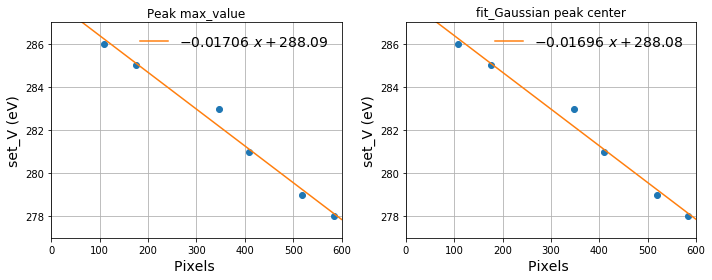

In [49]:
set_eV = np.array([278,279,281,283,285,286])
Center_max = np.array([584, 519, 409, 347, 175, 108])
Center_gaussian = np.array([585.43, 524.95, 408.93, 349.2, 173.16, 110.41])


plt.figure(figsize=[10,4])

plt.subplot(1,2,1)
popt1,x1,curve1,perr1 = fit(poly0,Center_max,set_eV)
plt.plot(Center_max,set_eV,'o')
plt.plot(x1,curve1,label = '$%.5f$ $x+{%.2f}$'%(popt1[0],popt1[1]))
plt.xlim(0,600)
plt.ylim(277,287)
plt.xlabel('Pixels ',size=14)
plt.ylabel('set_V (eV)',size=14)
plt.title('Peak max_value')
plt.legend(frameon=False,loc='upper right', prop={'size': 14})
plt.grid()
plt.tight_layout()

plt.subplot(1,2,2)
popt2,x2,curve2,perr2 = fit(poly0,Center_gaussian,set_eV)
plt.plot(Center_max,set_eV,'o')
plt.plot(x1,curve1,label = '$%.5f$ $x+{%.2f}$'%(popt2[0],popt2[1]))
plt.xlim(0,600)
plt.ylim(277,287)
plt.xlabel('Pixels ',size=14)
plt.ylabel('set_V (eV)',size=14)
plt.title('fit_Gaussian peak center')
plt.legend(frameon=False,loc='upper right', prop={'size': 14})
plt.grid()
plt.tight_layout()
plt.savefig('/Users/Hsin-YiWang/Desktop/%ftting_result.png', dpi=300)
plt.show()